In [18]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

### Sparsity and selectivity and test accuracy in one graph

In [19]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 4 == 0:
                line = ast.literal_eval(line)
                test_val_accumulator.append(line[-1])
    
    print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [20]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 4 == 0:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    sparsity_accumulator.append(0)
                else:
                    sparsity_accumulator.append(sparsity_list[-1])
                
    
    
    for i, element in enumerate(sparsity_accumulator):
        if not 0 <= element <= 1:
            print(f"{i}-th element: error")
            sparsity_accumulator[i] = 0
    
    print("\nsparsity_accumulator: ", sparsity_accumulator)
    return sparsity_accumulator

In [21]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 5 == 0:
                selectivity_average = ast.literal_eval(line)
                selectivity_average_accumulator.append(selectivity_average)
            if (i - 3) % 5 == 0:
                selectivity_std = ast.literal_eval(line)
                selectivity_std_accumulator.append(selectivity_std)
    
    print("\nselectivity_average_accumulator: ", selectivity_average_accumulator)
    print("\nselectivity_std_accumulator: ", selectivity_std_accumulator)
    return selectivity_average_accumulator, selectivity_std_accumulator

In [22]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(__list__, test_acc_list, marker='s', label='test accuracy', c='r')
    ax.plot(__list__, sparsity_list, marker='v', label='sparsity', c='g')
    ax.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

In [23]:
rho_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
betas_lhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
betas_rhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
learning_rate = np.logspace(-5, 1, 11)
weight_decay = np.logspace(-5, 1, 11)
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Adadelta

## learning rate


test_val_accumulator:  [0.1016, 0.2537, 0.5062, 0.7129, 0.8582, 0.9096, 0.9376, 0.9689, 0.9817, 0.983, 0.9833]

sparsity_accumulator:  [0.005, 0.0051, 0.0068, 0.0237, 0.0772, 0.1078, 0.1387, 0.181, 0.2807, 0.441, 0.6394]

selectivity_average_accumulator:  [0.029920824483668652, 0.03046706846178009, 0.04317893718275562, 0.11472607529534781, 0.20893355011385525, 0.23639389857815235, 0.25240237377303687, 0.2794081684519076, 0.3697536280691663, 0.5155289895687379, 0.6568011201367641]

selectivity_std_accumulator:  [0.011175631289007112, 0.011900280731635881, 0.01619138137320755, 0.03784762639694103, 0.06435427840686293, 0.09046648282640803, 0.13065947352524138, 0.17310978430744373, 0.18034812519728427, 0.15729215274694652, 0.16435870601413452]


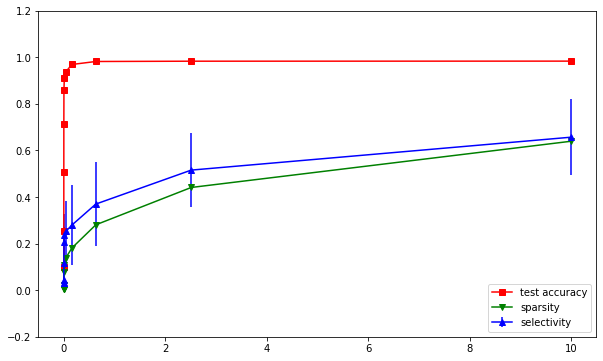

In [24]:
test_vals  = test_val_extractor('sparsity_adadelta_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_learning_rate.txt")

all_plotter(learning_rate, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')

## rho


test_val_accumulator:  [0.979, 0.9794, 0.9806, 0.9802, 0.9814, 0.9796, 0.9814, 0.9818, 0.9811, 0.9805, 0.9781]

sparsity_accumulator:  [0.2506, 0.2285, 0.218, 0.2238, 0.2406, 0.2317, 0.2723, 0.2789, 0.2932, 0.3229, 0.612]

selectivity_average_accumulator:  [0.32538553057227704, 0.2957938401792709, 0.2925926142568357, 0.2990244997122229, 0.3187995606582873, 0.3054916782366132, 0.34724519336903703, 0.3516578968761497, 0.36361793229414213, 0.40188000738159935, 0.5663960144088669]

selectivity_std_accumulator:  [0.20736523853694072, 0.2098907734279308, 0.213070659496437, 0.20737907456246304, 0.2065107290663925, 0.19855869961262052, 0.1973508746288204, 0.18679359396850606, 0.1779797664676398, 0.16566182619098682, 0.15162601839281234]


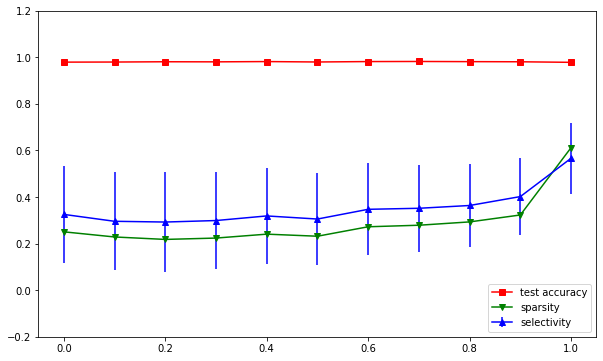

In [25]:
test_vals  = test_val_extractor('sparsity_adadelta_rho.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_rho.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_rho.txt")

all_plotter(rho_list, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')

## weight decay


test_val_accumulator:  [0.9822, 0.9808, 0.9757, 0.9602, 0.9132, 0.8778, 0.7251, 0.098, 0.1032, 0.101, 0.0892]
7-th element: error
8-th element: error

sparsity_accumulator:  [0.3112, 0.2945, 0.2729, 0.1903, 0.1111, 0.0712, 0.0362, 0, 0, 0.0085, 0.0708]

selectivity_average_accumulator:  [0.387458606093252, 0.379345391583166, 0.3388284395742854, 0.2764012512539832, 0.2667204321883134, 0.2064022914353626, 0.14581236763004168, 0.0021188362973671715, 0.0014498741636987387, 0.05335541829276051, 0.1534267932877817]

selectivity_std_accumulator:  [0.15907799035844444, 0.16484598899846492, 0.17387645871689208, 0.1710684037514141, 0.11372112370375675, 0.08825141159755291, 0.05205654210499923, 1.3618238547516405e-09, 2.168404344971009e-19, 0.020672366947616122, 0.06876527599615102]


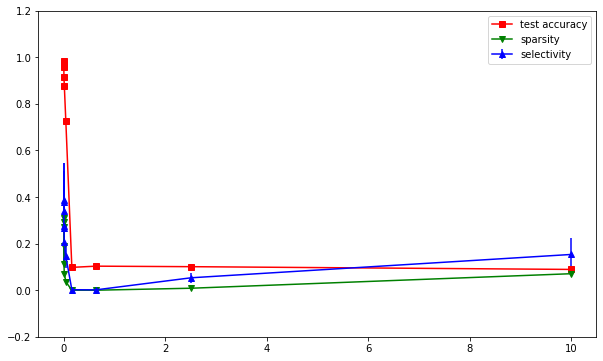

In [26]:
test_vals  = test_val_extractor('sparsity_adadelta_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'upper right')

## weight decay closer look


test_val_accumulator:  [0.9822, 0.9808, 0.9757, 0.9602, 0.9132, 0.8778, 0.7251, 0.098, 0.1032, 0.101, 0.0892]
7-th element: error
8-th element: error

sparsity_accumulator:  [0.3112, 0.2945, 0.2729, 0.1903, 0.1111, 0.0712, 0.0362, 0, 0, 0.0085, 0.0708]

selectivity_average_accumulator:  [0.387458606093252, 0.379345391583166, 0.3388284395742854, 0.2764012512539832, 0.2667204321883134, 0.2064022914353626, 0.14581236763004168, 0.0021188362973671715, 0.0014498741636987387, 0.05335541829276051, 0.1534267932877817]

selectivity_std_accumulator:  [0.15907799035844444, 0.16484598899846492, 0.17387645871689208, 0.1710684037514141, 0.11372112370375675, 0.08825141159755291, 0.05205654210499923, 1.3618238547516405e-09, 2.168404344971009e-19, 0.020672366947616122, 0.06876527599615102]


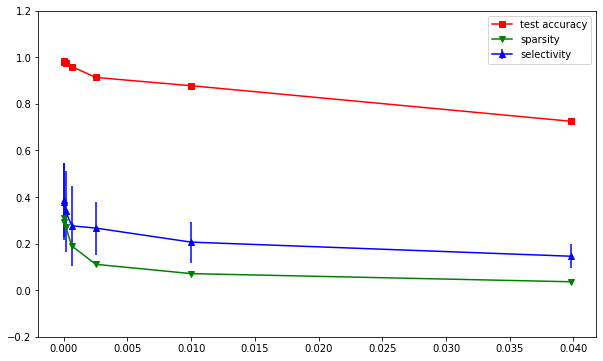

In [27]:
test_vals  = test_val_extractor('sparsity_adadelta_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'upper right')

# Adagrad

## learning rate


test_val_accumulator:  [0.46, 0.7165, 0.8256, 0.8993, 0.9326, 0.9649, 0.9816, 0.9757, 0.9671, 0.9538, 0.9065]

sparsity_accumulator:  [0.0067, 0.0172, 0.0764, 0.1402, 0.1778, 0.2345, 0.3998, 0.7438, 0.5925, 0.6735, 0.539]

selectivity_average_accumulator:  [0.0398359279523026, 0.08964068286074822, 0.21323167078976152, 0.27828052401996783, 0.3066073551695825, 0.35478835194012065, 0.5190714679254544, 0.7235626377843205, 0.7213649543173327, 0.8394429916435525, -1]

selectivity_std_accumulator:  [0.01453447750092088, 0.02579428954623502, 0.05886453831016201, 0.08680054668234716, 0.1265934427551766, 0.16868064800078386, 0.16324804614996136, 0.16601419696941955, 0.32853560912638013, 0.28700328797268465, -1]

learning_rate_1 [1.00000000e-05 3.98107171e-05 1.58489319e-04 6.30957344e-04
 2.51188643e-03 1.00000000e-02 3.98107171e-02 1.58489319e-01
 6.30957344e-01 2.51188643e+00 1.00000000e+01]

learning_rate_1 [1.00000000e-05 3.98107171e-05 1.58489319e-04 6.30957344e-04
 2.51188643e-03 1.000000

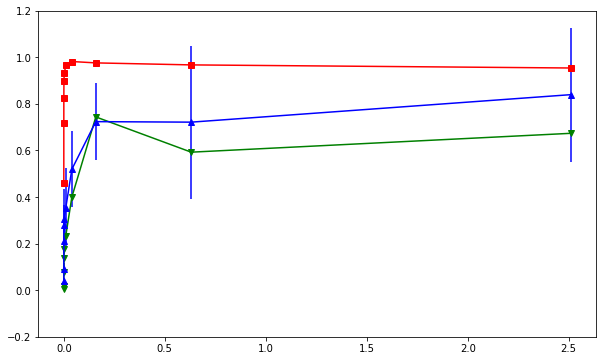

In [29]:
test_vals  = test_val_extractor('sparsity_adagrad_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_adagrad_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adagrad_learning_rate.txt")

learning_rate_1 = np.logspace(-5, 1, 11)
print("\nlearning_rate_1", learning_rate_1)
learning_rate_1 = learning_rate_1[:10]
print("\nlearning_rate_1", learning_rate_1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(learning_rate_1, test_vals[:10], marker='s', label='test accuracy', c='r')
ax.plot(learning_rate_1, sparsities[:10], marker='v', label='sparsity', c='g')
ax.errorbar(learning_rate_1, selectivity_average[:10], selectivity_std[:10], marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
plt.show()

## weight decay


test_val_accumulator:  [0.9643, 0.9632, 0.96, 0.9442, 0.917, 0.8933, 0.7941, 0.1135, 0.1135, 0.1032, 0.101]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.223, 0.2137, 0.1839, 0.1246, 0.0708, 0.0511, 0.0303, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.33996340100293165, 0.33136160160251504, 0.30882061707627306, 0.24811695222381644, 0.18867470421494942, 0.16436565885333793, 0.13118931468461892, 0.001537111633300981, 0.00026033000362239147, 0, 0]

selectivity_std_accumulator:  [0.16236318664636223, 0.15283746424428943, 0.14904520073615557, 0.1271422653955837, 0.0795400430217516, 0.05936656123187247, 0.043026971498720715, 0.00011829432986065786, 0, 0, 0]


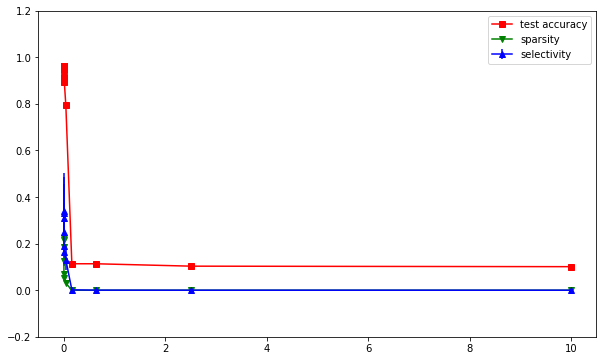

In [30]:
test_vals  = test_val_extractor('sparsity_adagrad_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adagrad_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adagrad_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look


test_val_accumulator:  [0.9643, 0.9632, 0.96, 0.9442, 0.917, 0.8933, 0.7941, 0.1135, 0.1135, 0.1032, 0.101]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.223, 0.2137, 0.1839, 0.1246, 0.0708, 0.0511, 0.0303, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.33996340100293165, 0.33136160160251504, 0.30882061707627306, 0.24811695222381644, 0.18867470421494942, 0.16436565885333793, 0.13118931468461892, 0.001537111633300981, 0.00026033000362239147, 0, 0]

selectivity_std_accumulator:  [0.16236318664636223, 0.15283746424428943, 0.14904520073615557, 0.1271422653955837, 0.0795400430217516, 0.05936656123187247, 0.043026971498720715, 0.00011829432986065786, 0, 0, 0]


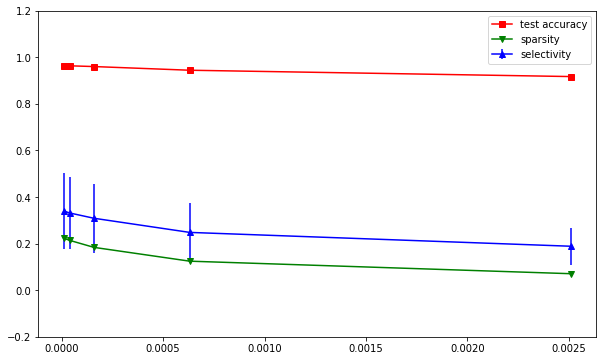

In [31]:
test_vals  = test_val_extractor('sparsity_adagrad_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adagrad_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adagrad_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-6]
new_sparsities = new_sparsities[:-6]
new_selectivity_average = new_selectivity_average[:-6]
new_selectivity_std = new_selectivity_std[:-6]
new_weight_decay = new_weight_decay[:-6]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

# Adam

## betas lhs


test_val_accumulator:  [0.9808, 0.9813, 0.9821, 0.9813, 0.9815, 0.9826, 0.9805, 0.9796, 0.9788, 0.9814, 0.9786]

sparsity_accumulator:  [0.3029, 0.3054, 0.2983, 0.2992, 0.3024, 0.2937, 0.3009, 0.2907, 0.3034, 0.3026, 0.3104]

selectivity_average_accumulator:  [0.38541991041729307, 0.3857602847012982, 0.38011045565931145, 0.3798536753754879, 0.3784516056719871, 0.3720024467730436, 0.3833080331845863, 0.37321861599493816, 0.3882907440846222, 0.38465004629316435, 0.399506081890434]

selectivity_std_accumulator:  [0.16642415479883457, 0.17353551270611373, 0.17262314546374766, 0.16827379626026834, 0.1633492000729735, 0.1714419885049513, 0.1705962390145244, 0.1796800354807016, 0.1778509028157246, 0.1728631913100536, 0.22588207850577674]


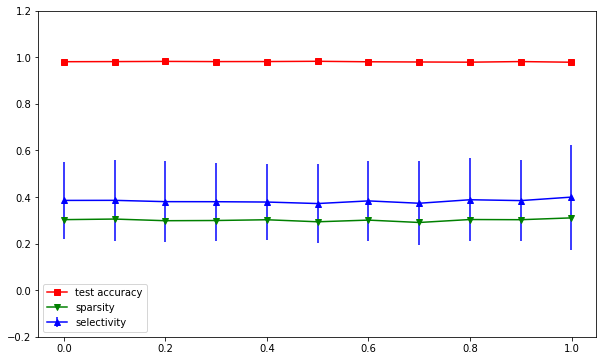

In [32]:
test_vals  = test_val_extractor('sparsity_Adam_betas_lhs.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_betas_lhs.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_betas_lhs.txt")

all_plotter(betas_lhs, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## betas rhs 재검토 필요


test_val_accumulator:  [0.0984, 0.0644, 0.1687, 0.8215, 0.9213, 0.9531, 0.9646, 0.9775, 0.9802, 0.9793, 0.9809]

sparsity_accumulator:  [0.4706, 0.4371, 0.2477, 0.5489, 0.4899, 0.4868, 0.4407, 0.3163, 0.2905, 0.284, 0.2924]

selectivity_average_accumulator:  [-1, -1, -1, -1, -1, -1, -1, 0.3746808288173768, 0.3548070230170139, 0.357065496887337, 0.3756828437434956]

selectivity_std_accumulator:  [-1, -1, -1, -1, -1, -1, -1, 0.19430475099405883, 0.16979774576933285, 0.16963403569870128, 0.17564998310258215]


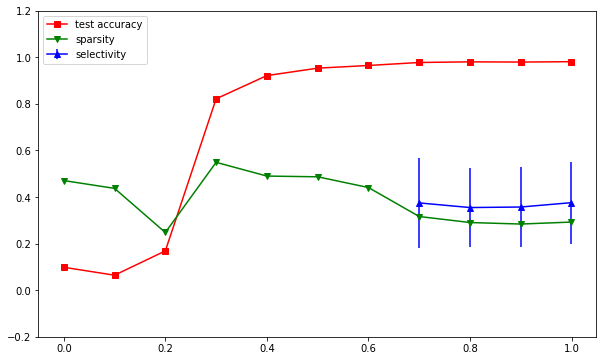

In [37]:
test_vals  = test_val_extractor('sparsity_Adam_betas_rhs.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_betas_rhs.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_betas_rhs.txt")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(betas_rhs, test_vals, marker='s', label='test accuracy', c='r')
ax.plot(betas_rhs, sparsities, marker='v', label='sparsity', c='g')
ax.errorbar(betas_rhs[7:], selectivity_average[7:], selectivity_std[7:], marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
ax.legend()
plt.show()

## learning rate 


test_val_accumulator:  [0.9133, 0.9432, 0.9738, 0.9803, 0.9816, 0.9735, 0.948, 0.9188, 0.8275, 0.5945, 0.5851]

sparsity_accumulator:  [0.1515, 0.1811, 0.23, 0.2839, 0.3814, 0.5991, 0.6233, 0.8216, 0.5848, 0.6082, 0.4316]

selectivity_average_accumulator:  [0.286013571851649, 0.30447829526976655, 0.33305350004222156, 0.3724600301505156, 0.45079746148722855, 0.6362096072669707, 0.7266374893851317, -1, -1, -1, -1]

selectivity_std_accumulator:  [0.10189887264297863, 0.13829192565850681, 0.16005057092925, 0.1699982411838032, 0.1940418348144981, 0.2647482212453654, 0.33368711688872854, -1, -1, -1, -1]


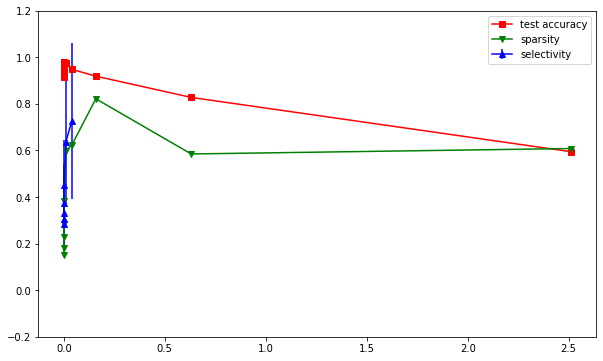

In [53]:
test_vals  = test_val_extractor('sparsity_Adam_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_learning_rate.txt")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(learning_rate[:-1], test_vals[:-1], marker='s', label='test accuracy', c='r')
ax.plot(learning_rate[:-1], sparsities[:-1], marker='v', label='sparsity', c='g')
ax.errorbar(learning_rate[:-4], selectivity_average[:-4], selectivity_std[:-4], marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
ax.legend()
plt.show()

## learning rate closer look


test_val_accumulator:  [0.9133, 0.9432, 0.9738, 0.9803, 0.9816, 0.9735, 0.948, 0.9188, 0.8275, 0.5945, 0.5851]

sparsity_accumulator:  [0.1515, 0.1811, 0.23, 0.2839, 0.3814, 0.5991, 0.6233, 0.8216, 0.5848, 0.6082, 0.4316]

selectivity_average_accumulator:  [0.286013571851649, 0.30447829526976655, 0.33305350004222156, 0.3724600301505156, 0.45079746148722855, 0.6362096072669707, 0.7266374893851317, -1, -1, -1, -1]

selectivity_std_accumulator:  [0.10189887264297863, 0.13829192565850681, 0.16005057092925, 0.1699982411838032, 0.1940418348144981, 0.2647482212453654, 0.33368711688872854, -1, -1, -1, -1]


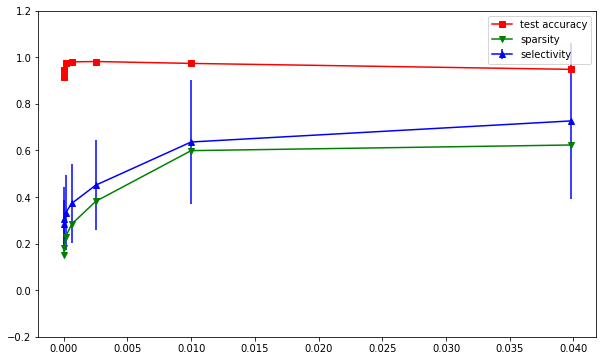

In [62]:
test_vals  = test_val_extractor('sparsity_Adam_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_learning_rate.txt")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(learning_rate[:-4], test_vals[:-4], marker='s', label='test accuracy', c='r')
ax.plot(learning_rate[:-4], sparsities[:-4], marker='v', label='sparsity', c='g')
ax.errorbar(learning_rate[:-4], selectivity_average[:-4], selectivity_std[:-4], marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
ax.legend()
plt.show()

## weight decay


test_val_accumulator:  [0.982, 0.9816, 0.9772, 0.9583, 0.9237, 0.8882, 0.7659, 0.1135, 0.1135, 0.0974, 0.0982]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.2782, 0.2595, 0.244, 0.1536, 0.0867, 0.0616, 0.0311, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.37254896951460936, 0.34782364975344404, 0.30148966842135777, 0.23581933402654104, 0.21269043284504124, 0.1744475975601252, 0.1331063019807483, 0.0061969466020200615, 0.0009193799255512603, 0.0002702094248621612, 0.00014301019164617357]

selectivity_std_accumulator:  [0.17418884755729883, 0.1725284216701108, 0.18551116999281805, 0.18088810083084222, 0.11371941977766395, 0.08159584718276403, 0.04525385044720715, 0, 0, 0, 0]


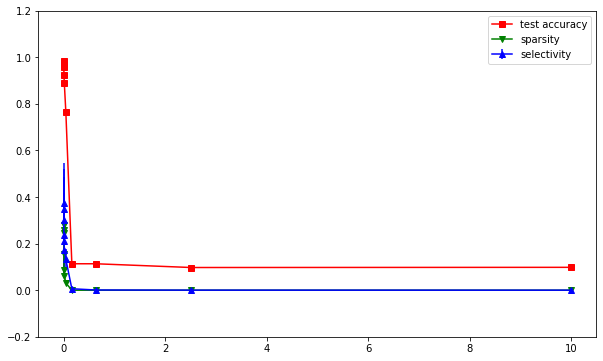

In [70]:
test_vals  = test_val_extractor('sparsity_Adam_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look


test_val_accumulator:  [0.982, 0.9816, 0.9772, 0.9583, 0.9237, 0.8882, 0.7659, 0.1135, 0.1135, 0.0974, 0.0982]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.2782, 0.2595, 0.244, 0.1536, 0.0867, 0.0616, 0.0311, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.37254896951460936, 0.34782364975344404, 0.30148966842135777, 0.23581933402654104, 0.21269043284504124, 0.1744475975601252, 0.1331063019807483, 0.0061969466020200615, 0.0009193799255512603, 0.0002702094248621612, 0.00014301019164617357]

selectivity_std_accumulator:  [0.17418884755729883, 0.1725284216701108, 0.18551116999281805, 0.18088810083084222, 0.11371941977766395, 0.08159584718276403, 0.04525385044720715, 0, 0, 0, 0]


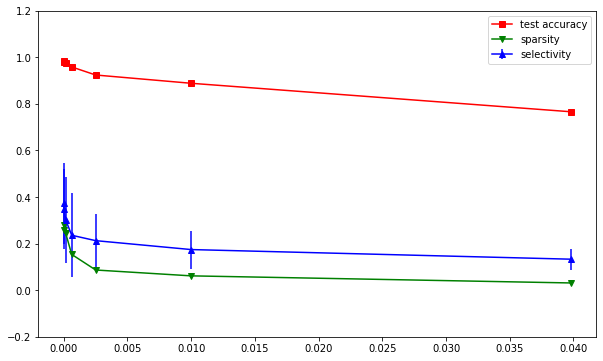

In [71]:
test_vals  = test_val_extractor('sparsity_Adam_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

# SGD

## learning rate


test_val_accumulator:  [0.1318, 0.2322, 0.5984, 0.7997, 0.893, 0.9208, 0.9514, 0.9758, 0.9816, 0.9688, 0.3016]

sparsity_accumulator:  [0.005, 0.0051, 0.0076, 0.0352, 0.0713, 0.0945, 0.1541, 0.2881, 0.4495, 0.8167, 0.9982]

selectivity_average_accumulator:  [0.02979703811815038, 0.03183313311753771, 0.0488316525226033, 0.13941003853357542, 0.20401495430406796, 0.2267811517153861, 0.2676279651365123, 0.39126502740140834, 0.5182600742995056, 0.7695027040029919, 0.8900965411827003]

selectivity_std_accumulator:  [0.011651478036640104, 0.01289595013437336, 0.018483330333206715, 0.04998504525089236, 0.07409362493118435, 0.09077086427390955, 0.15466519020227865, 0.15870945982231677, 0.15019102017851654, 0.13217361630681218, 0.026051068475173505]


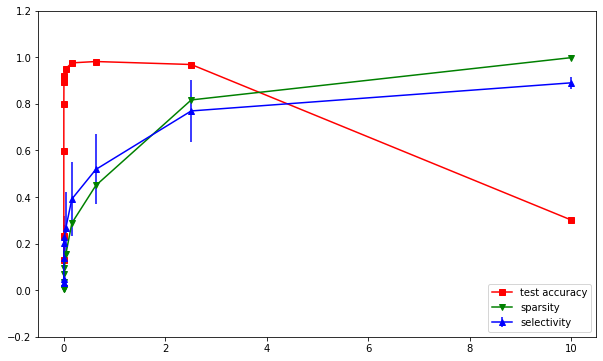

In [73]:
test_vals  = test_val_extractor('sparsity_SGD_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_learning_rate.txt")

all_plotter(learning_rate, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay


test_val_accumulator:  [0.9708, 0.97, 0.9674, 0.955, 0.9226, 0.8887, 0.6797, 0.0958, 0.0892, 0.1135, 0.0982]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.2212, 0.2285, 0.1834, 0.1346, 0.0803, 0.0596, 0.0333, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.3141479455967484, 0.33459657453791675, 0.29522540115972246, 0.26440807072751366, 0.2181731332127026, 0.18516835123080608, 0.1407802870598882, 0.004389954075694803, 0.0011069721671327563, 0.000353778353133393, 8.378939869478181e-05]

selectivity_std_accumulator:  [0.16020561523191715, 0.15666894888677743, 0.15471200449761827, 0.13914652782817752, 0.10624023170236915, 0.08274492222058928, 0.04815325809418183, 0, 0, 0, 0]


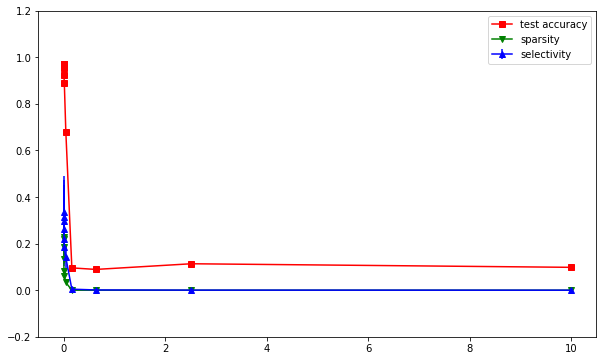

In [74]:
test_vals  = test_val_extractor('sparsity_SGD_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look


test_val_accumulator:  [0.9708, 0.97, 0.9674, 0.955, 0.9226, 0.8887, 0.6797, 0.0958, 0.0892, 0.1135, 0.0982]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.2212, 0.2285, 0.1834, 0.1346, 0.0803, 0.0596, 0.0333, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.3141479455967484, 0.33459657453791675, 0.29522540115972246, 0.26440807072751366, 0.2181731332127026, 0.18516835123080608, 0.1407802870598882, 0.004389954075694803, 0.0011069721671327563, 0.000353778353133393, 8.378939869478181e-05]

selectivity_std_accumulator:  [0.16020561523191715, 0.15666894888677743, 0.15471200449761827, 0.13914652782817752, 0.10624023170236915, 0.08274492222058928, 0.04815325809418183, 0, 0, 0, 0]


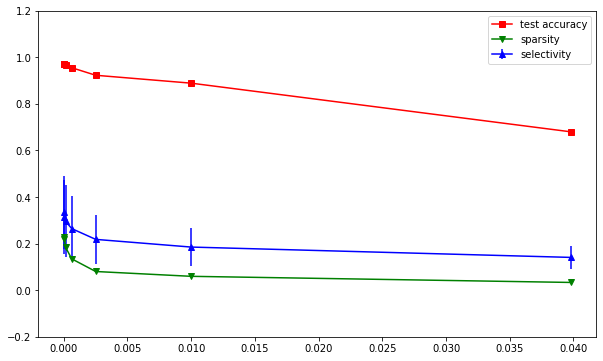

In [75]:
test_vals  = test_val_extractor('sparsity_SGD_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

## momentum


test_val_accumulator:  [0.9705, 0.9711, 0.9736, 0.9752, 0.9784, 0.976, 0.9805, 0.981, 0.9815, 0.9826, 0.3362]

sparsity_accumulator:  [0.2285, 0.2351, 0.247, 0.2622, 0.2755, 0.2831, 0.3133, 0.3383, 0.3845, 0.4529, 0.7206]

selectivity_average_accumulator:  [0.32794463869994145, 0.33386284971752184, 0.3412168752176733, 0.35834317412137523, 0.3685785542339096, 0.3773078039059874, 0.4117991847303092, 0.4224695206105491, 0.46583399973912876, 0.5218437631189505, -1]

selectivity_std_accumulator:  [0.165086509565978, 0.16549405294317676, 0.16425348187886576, 0.1576509306861337, 0.16903190646027438, 0.1752954894865096, 0.1708861851443712, 0.15296014189501034, 0.16182211835338461, 0.1533912794137705, -1]


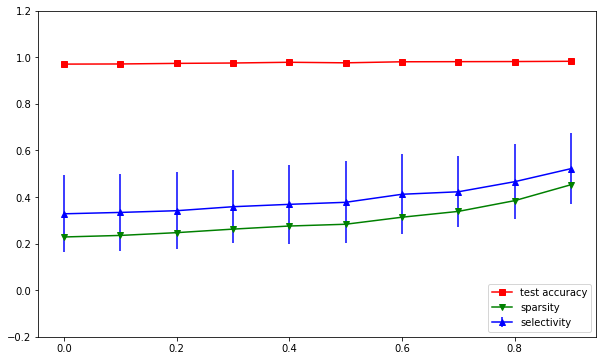

In [79]:
test_vals  = test_val_extractor('sparsity_SGD_momentum.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_momentum.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_momentum.txt")

all_plotter(momentum[:-1], test_vals[:-1], sparsities[:-1], selectivity_average[:-1], selectivity_std[:-1], 'lower right')